In [1]:
import os
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Perform EDA and Data Preprocessing**

In [2]:
# Load the dataset
dir = 'Male_and_Female_eye'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        label.append(os.path.split(dirname)[1])
        path.append(os.path.join(dirname,filename))
             
df = pd.DataFrame(columns=['Image','Label'])
df['Image']=path
df['Label']=label

df = shuffle(df)
df = df.reset_index(drop=True)

In [3]:
# Explore the data head
print(df.head())

                                     Image       Label
0     Male_and_Female_eye\maleeyes\465.jpg    maleeyes
1  Male_and_Female_eye\femaleeyes\4317.jpg  femaleeyes
2  Male_and_Female_eye\femaleeyes\5945.jpg  femaleeyes
3    Male_and_Female_eye\maleeyes\4708.jpg    maleeyes
4  Male_and_Female_eye\femaleeyes\5925.jpg  femaleeyes


In [49]:
# Explore the data tail
print(df.tail())

                                         Image       Label
10399    Male_and_Female_eye\maleeyes\5192.jpg    maleeyes
10400  Male_and_Female_eye\femaleeyes\6468.jpg  femaleeyes
10401    Male_and_Female_eye\maleeyes\2465.jpg    maleeyes
10402  Male_and_Female_eye\femaleeyes\3684.jpg  femaleeyes
10403    Male_and_Female_eye\maleeyes\6205.jpg    maleeyes


In [4]:
# check the lenght of the dataset
len(df)

11525

In [5]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11525 entries, 0 to 11524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   11525 non-null  object
 1   Label   11525 non-null  object
dtypes: object(2)
memory usage: 180.2+ KB


In [6]:
# check for null value
df.isnull().sum()

Image    0
Label    0
dtype: int64

### Data Preprocessing

maleeyes      6323
femaleeyes    5202
Name: Label, dtype: int64


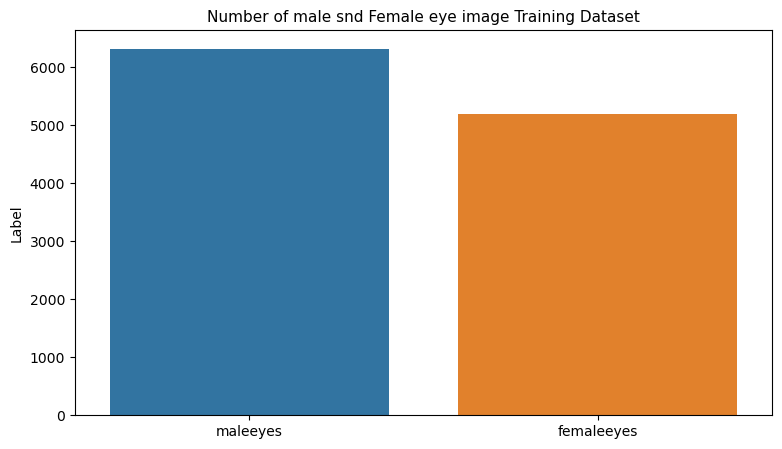

In [7]:
# Count number of samples for each category [Male, Female]
vc = df['Label'].value_counts()
print(vc)

plt.figure(figsize = (9, 5))
sns.barplot(x = vc.index, y = vc)
plt.title("Number of male snd Female eye image Training Dataset", fontsize = 11)
plt.show()

The graph above shows the distribution of Male and female eye images

In [8]:
# Using downsampling to balance the dataset, 
# as there is not a big difference in the total number of samples in both categories
from sklearn.utils import resample

# Dividing majority and minority classes
df_major = df[df.Label=='maleeyes']
df_minor = df[df.Label=='femaleeyes']

df_major_sample = resample(df_major,
               replace=False,  # Down sample without replacement
               n_samples=5202,   # Number to match minority class
               random_state=42)
  
# Combine both samples
df = pd.concat([df_major_sample, df_minor])
df = shuffle(df)
df = df.reset_index(drop=True)

# Display count of data points in both class
print(df.Label.value_counts())

df.describe()

maleeyes      5202
femaleeyes    5202
Name: Label, dtype: int64


Image     Label
count                                   10404     10404
unique                                  10404         2
top     Male_and_Female_eye\maleeyes\3282.jpg  maleeyes
freq                                        1      5202

In [9]:
# Get index of male and female eye
xx = df[df['Label'] == 'femaleeyes'].index[0] # index of female eye
xy = df[df['Label'] == 'maleeyes'].index[0] # index of male eye

Text(0.5, 1.0, 'femaleeyes')

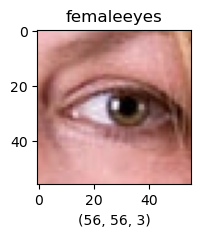

In [10]:
# visualize female eye
figure = plt.figure(figsize=(2,2))
x = plt.imread(df["Image"][xx])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Label"][xx])

Text(0.5, 1.0, 'maleeyes')

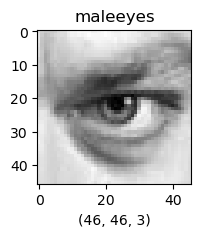

In [11]:
# visualize male eye
figure = plt.figure(figsize=(2, 2))
x = plt.imread(df["Image"][xy])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Label"][xy])

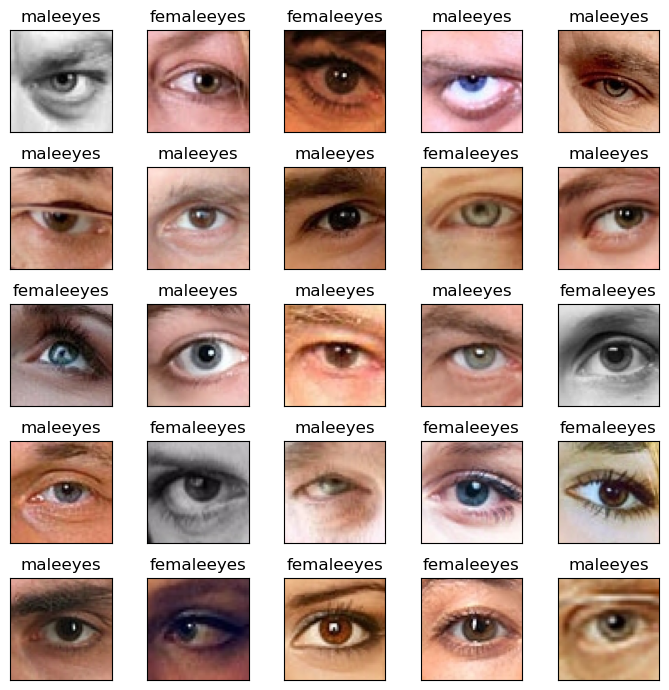

In [12]:
# plot more random images from dataset
fig, axes = plt.subplots(nrows = 5,
                        ncols = 5,
                        figsize = (7, 7),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["Image"][i]))
    ax.set_title(df["Label"][i])
plt.tight_layout()
plt.show()

In [13]:
# Checking image size
female_eye_size = plt.imread(df["Image"][xx])
print(female_eye_size.shape, '==>',  df['Label'][xx])

male_eye_size = plt.imread(df["Image"][xy])
print(male_eye_size.shape, '==>',  df['Label'][xy])

(56, 56, 3) ==> femaleeyes
(46, 46, 3) ==> maleeyes


In [14]:
# Check how many different sized images are there

size_list=set() # empty set to check the total different sizee of images

for x in range(len(df['Image'])):
    size_list.add(plt.imread(df["Image"][x]).shape)

print(len(size_list))
print('Smallest size :', list(sorted(size_list))[0])
print('Largest size :', list(sorted(size_list))[-1])

64
Smallest size : (41, 41, 3)
Largest size : (117, 117, 3)


In [15]:
import cv2

In [16]:
# Convert image path to array of image using cv2
size = (64,64)
df1 = df.copy()

size_list = set()
for i in range(len(df)):
    image=cv2.imread(df['Image'][i])
    image=cv2.resize(image,size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    size_list.add(image.shape)
    df1['Image'][i] = image.flatten()

In [17]:
# Check shape after resizing
size_list

{(64, 64, 3)}

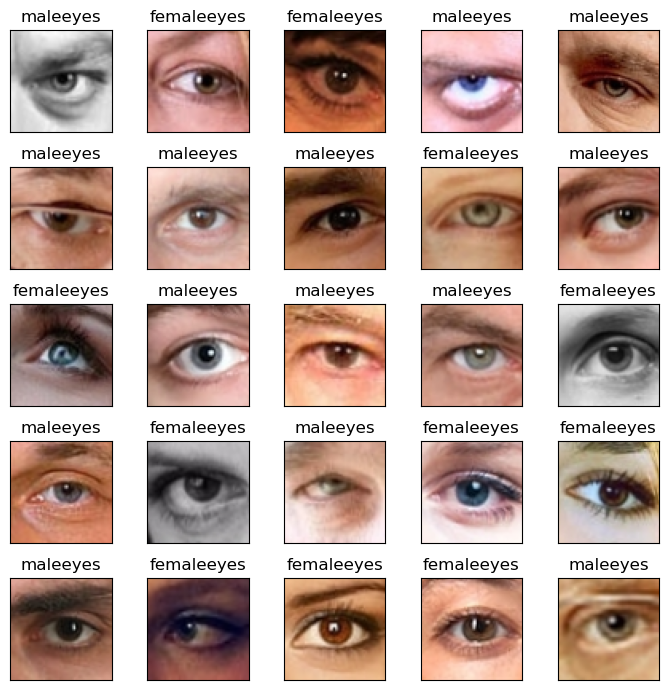

In [18]:
# check to see some random images again
fig, axes = plt.subplots(nrows = 5,
                        ncols = 5,
                        figsize = (7, 7),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(df1.Image[i].reshape(64,64,3))
    ax.set_title(df1["Label"][i])
plt.tight_layout()
plt.show()

A random print of some eye images from the dataset

In [19]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to numeric values
le = LabelEncoder()

df1['Label'] = np.asarray(le.fit_transform(df1["Label"]))

display(df1.head())

Image  Label
0  [222, 222, 222, 213, 213, 213, 204, 204, 204, ...      1
1  [247, 192, 197, 245, 189, 194, 243, 187, 193, ...      0
2  [52, 19, 10, 48, 15, 6, 47, 14, 6, 47, 16, 9, ...      0
3  [239, 180, 174, 245, 186, 180, 247, 188, 184, ...      1
4  [170, 114, 89, 174, 118, 94, 180, 124, 101, 18...      1

In [20]:
# Function to reset the index and reshape the array 
def cleaned(X):
    for i in range(len(X)):
        X[i] = np.vstack(X[i].reset_index(drop=True))
    return X

In [21]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.Image, df1.Label, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = cleaned([X_train, X_test, y_train, y_test])


In [22]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8323, 12288) (2081, 12288)
(8323, 1) (2081, 1)


# **Implement the 3 Classification Models**

## Model 1 - Benchmark model (SVM or KNN Classifier from Sklearn)

In [23]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [24]:
# Model 1a: SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("Model 1a: SVM")
print(classification_report(y_test, svm_predictions))

Model 1a: SVM
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1004
           1       0.89      0.90      0.90      1077

    accuracy                           0.89      2081
   macro avg       0.89      0.89      0.89      2081
weighted avg       0.89      0.89      0.89      2081



In [25]:
# Model 1b: KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("Model 1b: KNN Classifier")
print(classification_report(y_test, knn_predictions))

Model 1b: KNN Classifier
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1004
           1       0.82      0.87      0.84      1077

    accuracy                           0.83      2081
   macro avg       0.83      0.83      0.83      2081
weighted avg       0.83      0.83      0.83      2081



## **Model 2 - Multilayer Perceptron Model (using Keras)**

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [27]:
# Model 2: MLP
model_mlp = Sequential()
model_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_mlp.add(Dropout(0.5))  # Optional: Dropout layer to prevent overfitting
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history_mlp = model_mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
209/209 [==============================] - 14s 54ms/step - loss: 38.3661 - accuracy: 0.5071 - val_loss: 0.7953 - val_accuracy: 0.4991
Epoch 2/50
209/209 [==============================] - 11s 52ms/step - loss: 0.7009 - accuracy: 0.5021 - val_loss: 0.6908 - val_accuracy: 0.5285
Epoch 3/50
209/209 [==============================] - 12s 56ms/step - loss: 0.6937 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 4/50
209/209 [==============================] - 12s 55ms/step - loss: 0.7876 - accuracy: 0.5015 - val_loss: 0.6927 - val_accuracy: 0.5069
Epoch 5/50
209/209 [==============================] - 12s 58ms/step - loss: 0.7285 - accuracy: 0.5069 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 6/50
209/209 [==============================] - 12s 58ms/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 7/50
209/209 [==============================] - 12s 57ms/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy

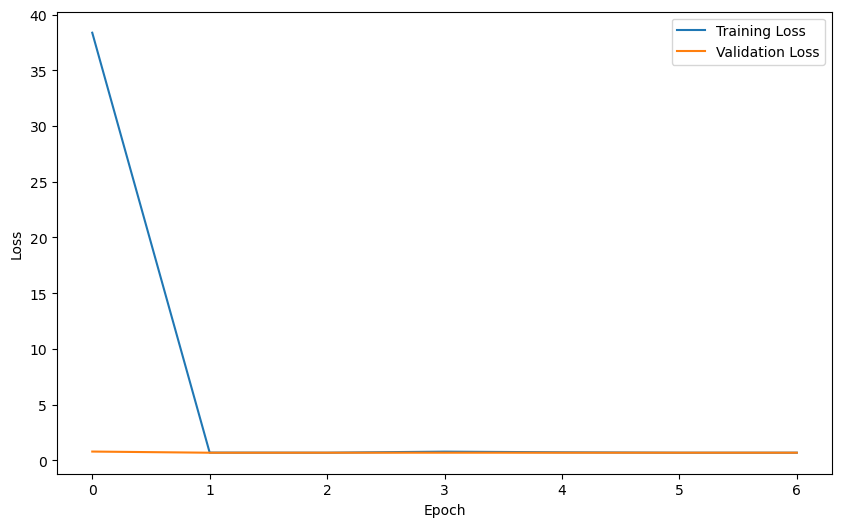

In [29]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The graph shows a sharp decrease in training loss at the 1st epoch and remained the all through.

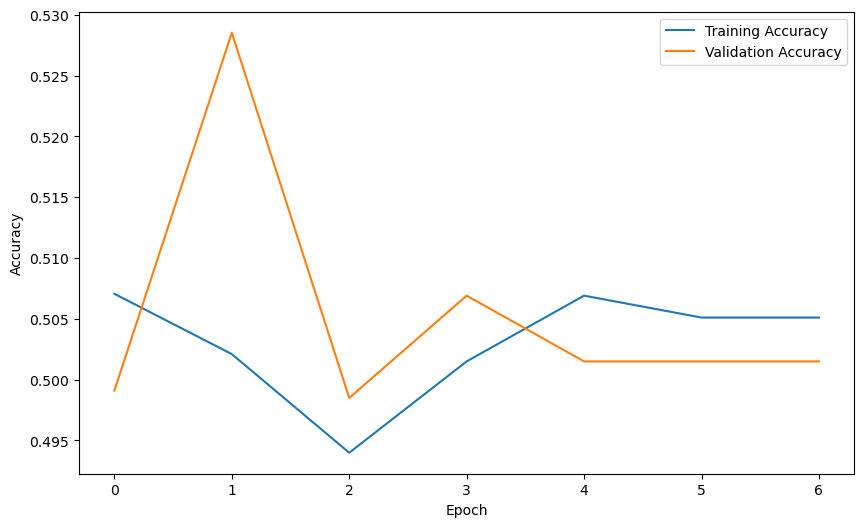

In [30]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph show an irregular movement of training and validation accuracy

In [31]:
# Evaluate the model
mlp_probabilities = model_mlp.predict(X_test)
mlp_predictions = (mlp_probabilities > 0.5).astype(int)

print("Model 2: MLP")
print(classification_report(y_test, mlp_predictions))

66/66 [==============================] - 1s 7ms/step
Model 2: MLP
              precision    recall  f1-score   support

           0       0.50      0.76      0.60      1004
           1       0.56      0.29      0.39      1077

    accuracy                           0.52      2081
   macro avg       0.53      0.52      0.49      2081
weighted avg       0.53      0.52      0.49      2081



## Model 3 - CNN model (using Keras)

In [32]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
import tensorflow as tf

In [33]:
# Helper function to convert images to tensor
def to_tensor(_list):
    LIST = []
    for i in range(len(_list)):
        LIST.append(tf.convert_to_tensor(_list[i]))
    return LIST

In [34]:
# Function to reset the index and reshape the array 
def cleaned2(X):
    for i in range(len(X)):
        X[i] = np.stack(X[i].reset_index(drop=True))
    return X

In [35]:
# Convert image path to array of image using cv2
size = (64,64)
df2 = df.copy()

for i in range(len(df)):
    image=cv2.imread(df['Image'][i])
    image=cv2.resize(image,size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    df2['Image'][i] = image
    
# Convert labels to numeric values
LE = LabelEncoder()

df2['Label'] = np.asarray(LE.fit_transform(df2["Label"]))

display(df2.head())

Image  Label
0  [[[222, 222, 222], [213, 213, 213], [204, 204,...      1
1  [[[247, 192, 197], [245, 189, 194], [243, 187,...      0
2  [[[52, 19, 10], [48, 15, 6], [47, 14, 6], [47,...      0
3  [[[239, 180, 174], [245, 186, 180], [247, 188,...      1
4  [[[170, 114, 89], [174, 118, 94], [180, 124, 1...      1

In [36]:
df2.Image[1].shape

(64, 64, 3)

In [38]:
# Deviding df to Train Test and Validation set
x_train1, x_val1, y_train1, y_val1 = train_test_split(df2.Image, df2.Label, test_size = 0.4, random_state = 7)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_val1, y_val1, test_size = 0.5, random_state = 7)

x_train1, x_val1, x_test1, y_train1, y_val1, y_test1 = cleaned2([x_train1, x_val1, x_test1, y_train1, y_val1, y_test1])
x_train1, x_val1, x_test1, y_train1, y_val1, y_test1 = to_tensor([x_train1, x_val1, x_test1, y_train1, y_val1, y_test1])

print("X Train: ", x_train1.shape) 
print("X Val: ", x_val1.shape) 
print("X Test: ", x_test1.shape) 
print("y Train: ", y_train1.shape) 
print("y Val: ", y_val1.shape) 
print("y test: ", y_test1.shape) 

X Train:  (6242, 64, 64, 3)
X Val:  (2081, 64, 64, 3)
X Test:  (2081, 64, 64, 3)
y Train:  (6242,)
y Val:  (2081,)
y test:  (2081,)


In [39]:
# Model 3: CNN
model_cnn = Sequential()
model_cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
history_cnn = model_cnn.fit(x_train1, y_train1, epochs=50, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50
157/157 [==============================] - 205s 1s/step - loss: 30.3638 - accuracy: 0.6769 - val_loss: 0.7716 - val_accuracy: 0.7078
Epoch 2/50
157/157 [==============================] - 193s 1s/step - loss: 0.4682 - accuracy: 0.8001 - val_loss: 0.6834 - val_accuracy: 0.7502
Epoch 3/50
157/157 [==============================] - 193s 1s/step - loss: 0.4205 - accuracy: 0.8280 - val_loss: 0.6334 - val_accuracy: 0.7838
Epoch 4/50
157/157 [==============================] - 200s 1s/step - loss: 0.2334 - accuracy: 0.9053 - val_loss: 0.6045 - val_accuracy: 0.7990
Epoch 5/50
157/157 [==============================] - 186s 1s/step - loss: 0.1744 - accuracy: 0.9367 - val_loss: 0.5779 - val_accuracy: 0.8207
Epoch 6/50
157/157 [==============================] - 205s 1s/step - loss: 0.1220 - accuracy: 0.9511 - val_loss: 0.7715 - val_accuracy: 0.7934
Epoch 7/50
157/157 [==============================] - 181s 1s/step - loss: 0.1515 - accuracy: 0.9481 - val_loss: 0.7640 - val_accuracy: 0.795

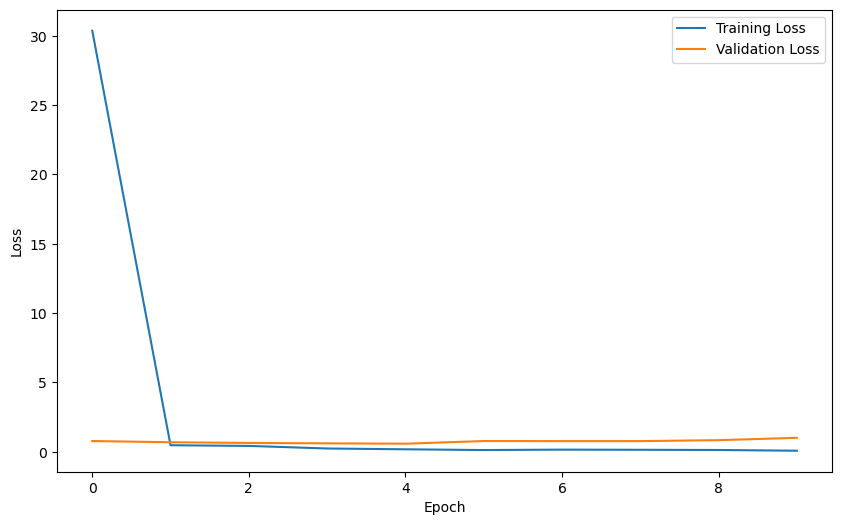

In [41]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The graph shows a sharp decrease in training loss at the 1st epoch and a continued drecrese till the end.

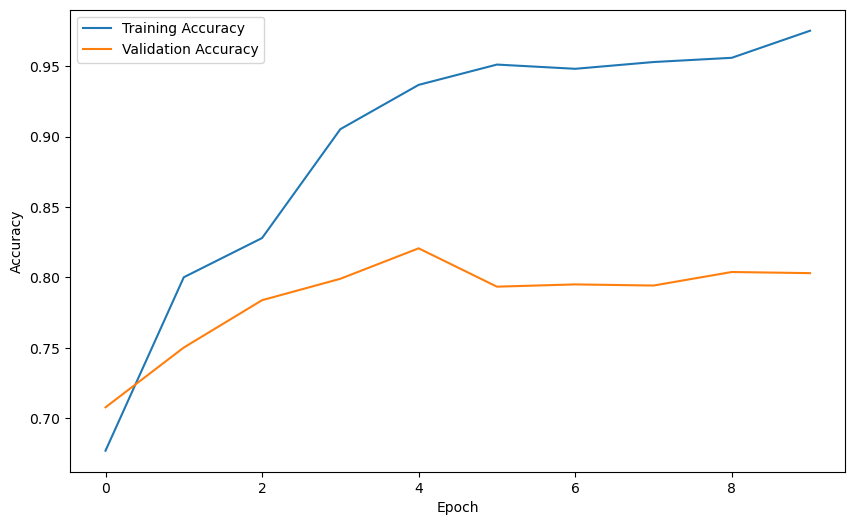

In [42]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph shows a continued increase in training and validation accuracy

In [43]:
# Evaluate the model
cnn_probabilities = model_cnn.predict(x_test1)
cnn_predictions = (cnn_probabilities > 0.5).astype(int)

print("Model 3: CNN")
print(classification_report(y_test1, cnn_predictions))

66/66 [==============================] - 9s 102ms/step
Model 3: CNN
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1048
           1       0.81      0.84      0.83      1033

    accuracy                           0.82      2081
   macro avg       0.82      0.82      0.82      2081
weighted avg       0.82      0.82      0.82      2081



## Compare the Performance of the 3 Models (show the code snippet)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [45]:
# Model 1a: SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)

print("Model 1a: SVM")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)

Model 1a: SVM
Accuracy: 0.893320518981259
Precision: 0.8947368421052632
Recall: 0.8997214484679665


In [46]:
# Model 1b: KNN Classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)

print("\nModel 1b: KNN Classifier")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)


Model 1b: KNN Classifier
Accuracy: 0.8313310908217203
Precision: 0.8162020905923345
Recall: 0.8700092850510678


In [47]:
# Model 2: MLP
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions)
mlp_recall = recall_score(y_test, mlp_predictions)

print("\nModel 2: MLP")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)


Model 2: MLP
Accuracy: 0.5165785679961556
Precision: 0.5632798573975044
Recall: 0.2934076137418756


In [48]:
# Model 3: CNN
cnn_accuracy = accuracy_score(y_test1, cnn_predictions)
cnn_precision = precision_score(y_test1, cnn_predictions)
cnn_recall = recall_score(y_test1, cnn_predictions)

print("\nModel 3: CNN")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)


Model 3: CNN
Accuracy: 0.8236424795771263
Precision: 0.8100558659217877
Recall: 0.8422071636011617


### Observations:

Model Performance: comparing the model performance, I have observed the following:

Model 1a (SVM) and Model 1b (KNN Classifier) are considered as benchmark models. They provide a baseline for performance comparison.

Model 2 (MLP) is a multilayer perceptron neural network, and Model 3 (CNN) is a convolutional neural network. These two models are more complex and specialized for image data.

Accuracy: The accuracy of the models may vary based on the dataset and the preprocessing steps. Generally, CNNs tend to perform well on image data, but it is important to tune hyperparameters and consider data augmentation techniques to avoid overfitting.

Precision and Recall: Precision and Recall are essential metrics for imbalanced datasets, where one class dominates the other. In gender classification like the this, imbalanced classes are common, and both precision and recall are crucial. A high precision means that the model makes fewer false positive predictions, while a high recall indicates that the model captures a significant number of true positive cases.

### Conclusion:

Based on the observations and performance metrics, i made following conclusions:

Model 1a (SVM) and Model 1b (KNN Classifier) provide reasonable baseline performance for the gender classification task using eye data. They both shows precision of 89% and 81% respectively, that provesa less false positive predition in the model.

Model 2 (MLP) can capture more complex patterns in the data and potentially perform better with appropriate hyperparameter tuning. Regularization techniques like dropout can be used to prevent overfitting. Based the on the result MLP show a high false predition of with 56% of precision value and accuracy of 51%. which is basically the lowest compared to other models.

Model 3 (CNN) can leverage spatial information in the eye images. CNN is specifically designed for image classification dataset. It has the potential to outperform the other models, especially when working with larger image datasets. CNN model show a good result based on the Precision value of 81%.

I implemented Hyperparameter tuning, including learning rates, batch sizes, number of layers, and neurons, can significantly impact model performance. implemented early stopping to prevent overfitting and improve the model's generalization ability.

Lastly, the choice of the best model depends on the specific dataset and the available computational resources. For small datasets, a simpler model like SVM or KNN may suffice. As the dataset size increases and the complexity of the task grows, neural network models like MLP and CNN become more advantageous. Proper evaluation and hyperparameter tuning are crucial to achieving the best performance. Also, data augmentation, and regularization techniques play a vital role in improving model performance and preventing overfitting.